In [1]:
import numpy as np
from scipy.stats import binom

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", context='talk', font_scale=1.5, font="Helvetica")

# Why become a follower of Bayes? 

There are many reasons to switch from the tried-and-true frequentist
approaches to make sense of biological data to the Bayesian realm of
the highest density intervals and posterior predictive distributions. In my
view, one of the best reasons is the strange way that the ``intention'' of
the person conducting an experiment can affect the outcome of the
frequentist approach. I first encountered this example in John Kruschke's
fantastic book, _Doing Bayesian Data Analysis_.

## A Dataset of $N$ coin tosses 

Consider that you have been given a dataset containing the outcomes of
$N=20$ coin flips, with $k=7$ are heads. Our question is quite simple, ``is the coin fair?''

Framing the question in a way that demands a yes/no answer, is at the very
heart of null hypothesis significant testing that has been the most common
way to analyze experimental results, since it's generally the only way that
statistics is taught scientist. 

To answer this question, we should calculate the dreaded $p$-value. It
seems even the most well-qualified of people disagree about what $p$-value
actually means (For example, see [The American Statistical Association
statement on
P-values](https://www.amstat.org/asa/files/pdfs/p-valuestatement.pdf)). 

The problem in our coin-flips case is quite instructive since it highlights the general
problems when one attempts to calculate $p$-value. 

### What if the experiment was stopped after it reached $N$ data points?

In this scenario, the experimenter simply wanted $N$ data points, and after
she flipped $20$ coins, she stopped. In that case, we can simply use the
binomial distribution:

$$f(k) = \binom{n}{k} p^{k} (1 - p)^{n-k}$$

[(0.0, 20.0), [], Text(0.5, 0, 'Number of heads')]

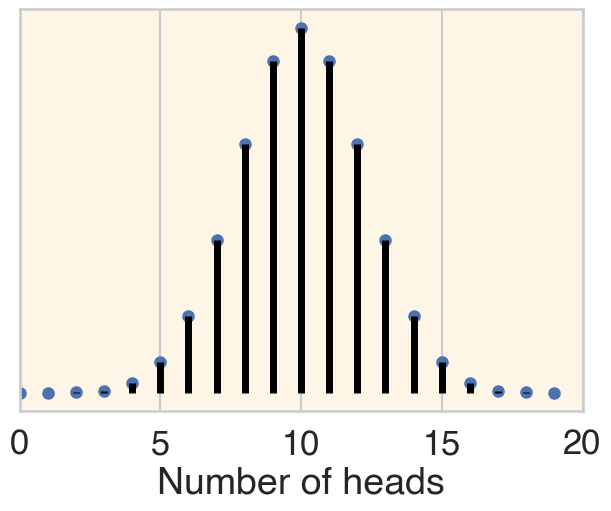

In [2]:
n, p = 20, 0.5
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(6,5),
    constrained_layout=True)

x = np.arange(binom.ppf(0.0, n, p),
              binom.ppf(1, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='black', lw=5, alpha=1)
ax.set_facecolor('oldlace')
ax.set(xlim=(0,20), yticks=[], xlabel='Number of heads')
